In [210]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
X_train = pd.read_csv("./Dataset/classy_points/Logistic_X_Train.csv")
Y_train = pd.read_csv("./Dataset/classy_points/Logistic_Y_Train.csv")

In [212]:
X_train = X_train.values
Y_train = Y_train.values

In [213]:
print(X_train.shape,Y_train.shape)

(2250, 2) (2250, 1)


In [214]:
from keras import models
from keras.layers import Dense

In [215]:
model = models.Sequential()

model.add(Dense(10,activation='relu',input_shape=(2,)))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [216]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_59 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [217]:
x_val = X_train[:250]
y_val = Y_train[:250]

X_newTrain = X_train[250:]
Y_newTrain = Y_train[250:]

In [218]:
hist = model.fit(X_train,Y_train,epochs=70,batch_size=64,validation_data =(x_val,y_val))

Train on 2250 samples, validate on 250 samples
Epoch 1/70
2250/2250 [==============================] - 1s 545us/step - loss: 0.6755 - acc: 0.6911 - val_loss: 0.6451 - val_acc: 0.7200
Epoch 2/70
2250/2250 [==============================] - 0s 24us/step - loss: 0.6071 - acc: 0.7324 - val_loss: 0.5652 - val_acc: 0.7600
Epoch 3/70
2250/2250 [==============================] - 0s 27us/step - loss: 0.5249 - acc: 0.7818 - val_loss: 0.4843 - val_acc: 0.8280
Epoch 4/70
2250/2250 [==============================] - 0s 30us/step - loss: 0.4509 - acc: 0.8387 - val_loss: 0.4222 - val_acc: 0.8440
Epoch 5/70
2250/2250 [==============================] - 0s 31us/step - loss: 0.3989 - acc: 0.8622 - val_loss: 0.3797 - val_acc: 0.8520
Epoch 6/70
2250/2250 [==============================] - 0s 30us/step - loss: 0.3628 - acc: 0.8671 - val_loss: 0.3498 - val_acc: 0.8560
Epoch 7/70
2250/2250 [==============================] - 0s 28us/step - loss: 0.3370 - acc: 0.8662 - val_loss: 0.3287 - val_acc: 0.8560
Epoch 8

2250/2250 [==============================] - 0s 30us/step - loss: 0.1164 - acc: 0.9556 - val_loss: 0.1146 - val_acc: 0.9680
Epoch 61/70
2250/2250 [==============================] - 0s 29us/step - loss: 0.1153 - acc: 0.9573 - val_loss: 0.1139 - val_acc: 0.9640
Epoch 62/70
2250/2250 [==============================] - 0s 25us/step - loss: 0.1144 - acc: 0.9578 - val_loss: 0.1130 - val_acc: 0.9680
Epoch 63/70
2250/2250 [==============================] - 0s 32us/step - loss: 0.1128 - acc: 0.9569 - val_loss: 0.1119 - val_acc: 0.9640
Epoch 64/70
2250/2250 [==============================] - 0s 30us/step - loss: 0.1123 - acc: 0.9600 - val_loss: 0.1116 - val_acc: 0.9640
Epoch 65/70
2250/2250 [==============================] - 0s 28us/step - loss: 0.1118 - acc: 0.9604 - val_loss: 0.1120 - val_acc: 0.9600
Epoch 66/70
2250/2250 [==============================] - 0s 29us/step - loss: 0.1105 - acc: 0.9604 - val_loss: 0.1113 - val_acc: 0.9680
Epoch 67/70
2250/2250 [==============================] - 0s 

In [219]:
h = hist.history

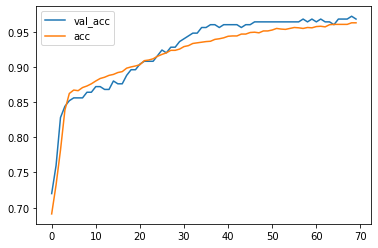

In [220]:
plt.plot(h['val_acc'],label="val_acc")
plt.plot(h['acc'],label="acc")
plt.legend()

In [221]:
model.evaluate(X_train,Y_train)[1]

2250/2250 [==============================] - 0s 27us/step


0.9622222221162584

In [222]:
X_test = pd.read_csv("./Dataset/classy_points/Logistic_X_Test.csv")
X_test = X_test.values

In [223]:
output = model.predict(X_test)

In [225]:
newOutput = []
m = output.shape[0]
for i in range(m):
    if output[i]>=0.5:
        newOutput.append("1")
    else:
        newOutput.append("0")

In [227]:
print(newOutput)

['0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1',

In [228]:
y =  pd.DataFrame(data=newOutput,columns=["label"]) 
y.to_csv("clssfy_points.csv",index = False)